In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [3]:
#read the cleaned dataset
data = pd.read_excel('/content/drive/MyDrive/consumer/Source/dataset_clean.xlsx')
data.head()

,Unnamed: 0,text,target,cleaned_text
0,0,"আমি যখন তাদের কাছ থেকে এই ল্যাপটপটি কিনছিলাম, ...",1,ল্যাপটপটি কিনছিলাম বলেছিল দ্রুত পরিষেবা দেবে ব...
1,1,তাদের বিক্রয়োত্তর পরিষেবা এত দেরিতে যে তাদের ...,1,বিক্রয়োত্তর পরিষেবা দেরিতে কেনা সবচেয়ে খারাপ...
2,2,তাদের কাছ থেকে কিছু কেনার আগে তারা খুব মিষ্টি....,1,কেনার মিষ্টি আচরণ খারাপ ওঠে
3,3,"ভাই, এক বছর আগে একটি পিসি বিল্ড করছি। এখন মাদ...",1,ভাই এক বছর পিসি বিল্ড করছি মাদারবোর্ডে সমস্যা ...
4,4,আমার ও M 21 ডিসপ্লেতে সমস্যা। এ খনো ওয়ারেন্টি ...,1,ডিসপ্লেতে সমস্যা খনো ওয়ারেন্টি সাত মাস কিনেছি ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3026 non-null   int64 
 1   text          3026 non-null   object
 2   target        3026 non-null   int64 
 3   cleaned_text  3007 non-null   object
dtypes: int64(2), object(2)
memory usage: 94.7+ KB


In [5]:
data.drop(columns={'Unnamed: 0'},axis=1,inplace=True)
data.dropna(inplace=True)

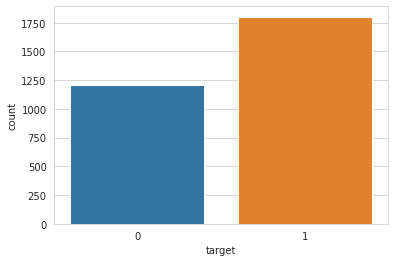

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = data)

In [7]:
# Remove the Text with least words

data['length'] = data['cleaned_text'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 3007


In [8]:
#calculate the summary of  dataset

def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned_text) for word in t.strip().split()]
    class_label= [k for k,v in dataset.target.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.target==label].cleaned_text) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.target==label].cleaned_text)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.target==label].cleaned_text))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  1
Number of Documents:1802
Number of Words:13627
Number of Unique Words:2135
Most Frequent Words:

না	534
স্যামসাং	241
ফোন	226
সমস্যা	204
খারাপ	182
বাজে	124
দাম	116
ডিসপ্লে	110
ভাই	109
বেশি	104

Class Name :  0
Number of Documents:1205
Number of Words:7134
Number of Unique Words:1441
Most Frequent Words:

ভালো	246
ভাল	148
ধন্যবাদ	106
না	105
ফোন	100
ভাই	99
সেরা	94
স্যামসাং	89
খুশি	70
সমস্যা	66
Total Number of Unique Words:2954


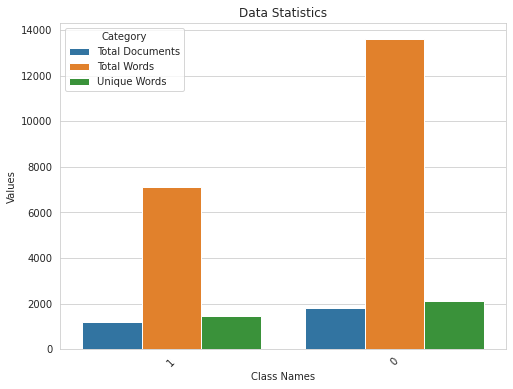

In [9]:
# plot the summary of  dataset

data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

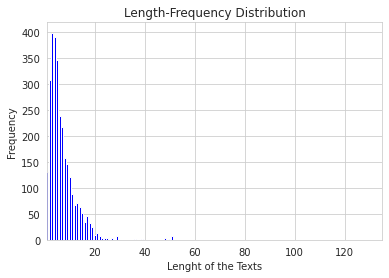

Maximum Length of a Text: 51
Minimum Length of a Text: 1
Average Length of a Text: 7.0


In [10]:
# Calculate the Text of each of the Text

dataset['TextLength'] = dataset.cleaned_text.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

In [11]:
#Label Encoding Function

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def label_encoding(target,bool):

    le = LabelEncoder()
    le.fit(target)
    encoded_labels = le.transform(target)
    labels = np.array(encoded_labels)
    class_names =le.classes_ 
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(target[i],' ', encoded_labels[i],'\n')

    return labels


In [12]:
#Dataset Splitting Function

def dataset_split(feature_space,target):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,target,train_size = 0.8,
                                                  test_size = 0.2,random_state =42,stratify=target)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [13]:
# N-gram calculation using tf-idf (term frequency–inverse document frequency)
def calc_gram_tfidf(texts,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X

In [14]:
#Unigram Tf-idf value calculation

def calc_unigram_tfidf(texts):
    tfidf = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X

In [15]:
#Bi-gram Tf-idf value calculation

def calc_bigram_tfidf(texts):
    tfidf = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X

In [16]:
#Tri-gram Tf-idf value calculation

def calc_trigram_tfidf(texts):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
#Define classification models
def model_defination():
    
    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 1, min_samples_split = 25)
    rf_model = RandomForestClassifier(criterion ='entropy', random_state = 13)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    
    return ml_models,model_names

In [19]:
#Define performance measures
def model_performace(model,X_train,X_test,y_train,y_test):
    
    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [20]:
# Create dataframe for results
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [21]:
path = "/content/drive/MyDrive/consumer/Source/json/"

In [22]:
## save the performance of the model for each gram feature import json

import json
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned_text,gram)
    labels = label_encoding(dataset.target,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = model_defination()
    
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}

    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 2954

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3007 
	Training		 2405 
	Test			 602


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Feature Size :======> 9947

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3007 
	Training		 2405 
	Test			 602


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Feature Size :======> 16652

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3007 
	Training		 2405 
	Test			 602


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [23]:
#Read the saved json file
accuracy1 = json.load(open('/content/drive/MyDrive/consumer/Source/json/ml_performance_Unigram.json'))
table1 = performance_table(accuracy1)
table1

,Accuracy,Precision,Recall,F1 Score
LR,93.19,93.19,93.19,93.19
DT,63.95,63.95,63.95,63.95
RF,95.85,95.85,95.85,95.85
MNB,92.86,92.86,92.86,92.86
KNN,80.07,80.07,80.07,80.07
Linear SVM,88.87,88.87,88.87,88.87
RBF SVM,92.36,92.36,92.36,92.36
SGD,95.51,95.51,95.51,95.51


In [24]:
print(f"Highest Accuracy achieved by {table1.Accuracy.idxmax(axis = 0)} at = {max(table1.Accuracy)}")
print(f"Highest F1-Score achieved by {table1['F1 Score'].idxmax(axis = 0)} at = {max(table1['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table1['Precision'].idxmax(axis = 0)} at = {max(table1['Precision'] )}")
print(f"Highest Recall Score achieved by {table1['Recall'].idxmax(axis = 0)} at = {max(table1['Recall'] )}")

Highest Accuracy achieved by RF at = 95.85000000000001
Highest F1-Score achieved by RF at = 95.85000000000001
Highest Precision Score achieved by RF at = 95.85000000000001
Highest Recall Score achieved by RF at = 95.85000000000001


In [25]:
#Read the saved json file
accuracy2 = json.load(open('/content/drive/MyDrive/consumer/Source/json/ml_performance_Bigram.json'))
table2 = performance_table(accuracy2)
table2

,Accuracy,Precision,Recall,F1 Score
LR,92.52,92.52,92.52,92.52
DT,63.95,63.95,63.95,63.95
RF,96.18,96.18,96.18,96.18
MNB,96.18,96.18,96.18,96.18
KNN,81.06,81.06,81.06,81.06
Linear SVM,87.21,87.21,87.21,87.21
RBF SVM,91.53,91.53,91.53,91.53
SGD,97.34,97.34,97.34,97.34


In [ ]:
print(f"Highest Accuracy achieved by {table2.Accuracy.idxmax(axis = 0)} at = {max(table2.Accuracy)}")
print(f"Highest F1-Score achieved by {table2['F1 Score'].idxmax(axis = 0)} at = {max(table2['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table2['Precision'].idxmax(axis = 0)} at = {max(table2['Precision'] )}")
print(f"Highest Recall Score achieved by {table2['Recall'].idxmax(axis = 0)} at = {max(table2['Recall'] )}")

Highest Accuracy achieved by SGD at = 97.34
Highest F1-Score achieved by SGD at = 97.34
Highest Precision Score achieved by SGD at = 97.34
Highest Recall Score achieved by SGD at = 97.34


In [26]:
#Read the saved json file
accuracy3 = json.load(open('/content/drive/MyDrive/consumer/Source/json/ml_performance_Trigram.json'))
table3 = performance_table(accuracy3)
table3

,Accuracy,Precision,Recall,F1 Score
LR,91.86,91.86,91.86,91.86
DT,63.95,63.95,63.95,63.95
RF,96.35,96.35,96.35,96.35
MNB,95.68,95.68,95.68,95.68
KNN,80.73,80.73,80.73,80.73
Linear SVM,84.55,84.55,84.55,84.55
RBF SVM,90.37,90.37,90.37,90.37
SGD,97.01,97.01,97.01,97.01


In [27]:
print(f"Highest Accuracy achieved by {table3.Accuracy.idxmax(axis = 0)} at = {max(table3.Accuracy)}")
print(f"Highest F1-Score achieved by {table3['F1 Score'].idxmax(axis = 0)} at = {max(table3['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table3['Precision'].idxmax(axis = 0)} at = {max(table3['Precision'] )}")
print(f"Highest Recall Score achieved by {table3['Recall'].idxmax(axis = 0)} at = {max(table3['Recall'] )}")

Highest Accuracy achieved by SGD at = 97.00999999999999
Highest F1-Score achieved by SGD at = 97.00999999999999
Highest Precision Score achieved by SGD at = 97.00999999999999
Highest Recall Score achieved by SGD at = 97.00999999999999


# Final Model

 - Selected feature: Bigram
 - Selected model: SGD

In [28]:
# calculate the Bi-gram Tf-idf feature
cv,feature_vector = calc_bigram_tfidf(dataset.cleaned_text)

lables = label_encoding(dataset.target,False)

X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,target=lables)

Feature Size :======> 9947

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3007 
	Training		 2405 
	Test			 602


In [29]:
# Train SGD model and calculate the pred value
classifier1 = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [30]:
# calculate train and test accuracy 
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 99.71%
Test Accuracy is : 97.18%


In [31]:
# calculate classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       241
           1       0.97      0.99      0.98       361

    accuracy                           0.97       602
   macro avg       0.97      0.97      0.97       602
weighted avg       0.97      0.97      0.97       602



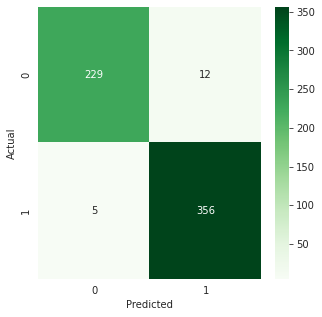

In [32]:
# plot confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [33]:
# compute ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9682


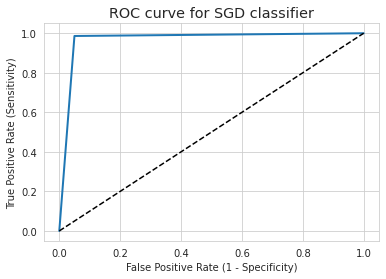

In [34]:
# plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SGD classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [35]:
# calculate cross-validated-score

kfold=KFold(n_splits=5, shuffle=True, random_state=0)

Cross_validated_Score = cross_val_score(classifier1, X_train, y_train, cv=kfold).mean()

print('Cross validated Score : {:.4f}'.format(Cross_validated_Score))

Cross validated Score : 0.9547


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_grad